Initial Challenge Board:


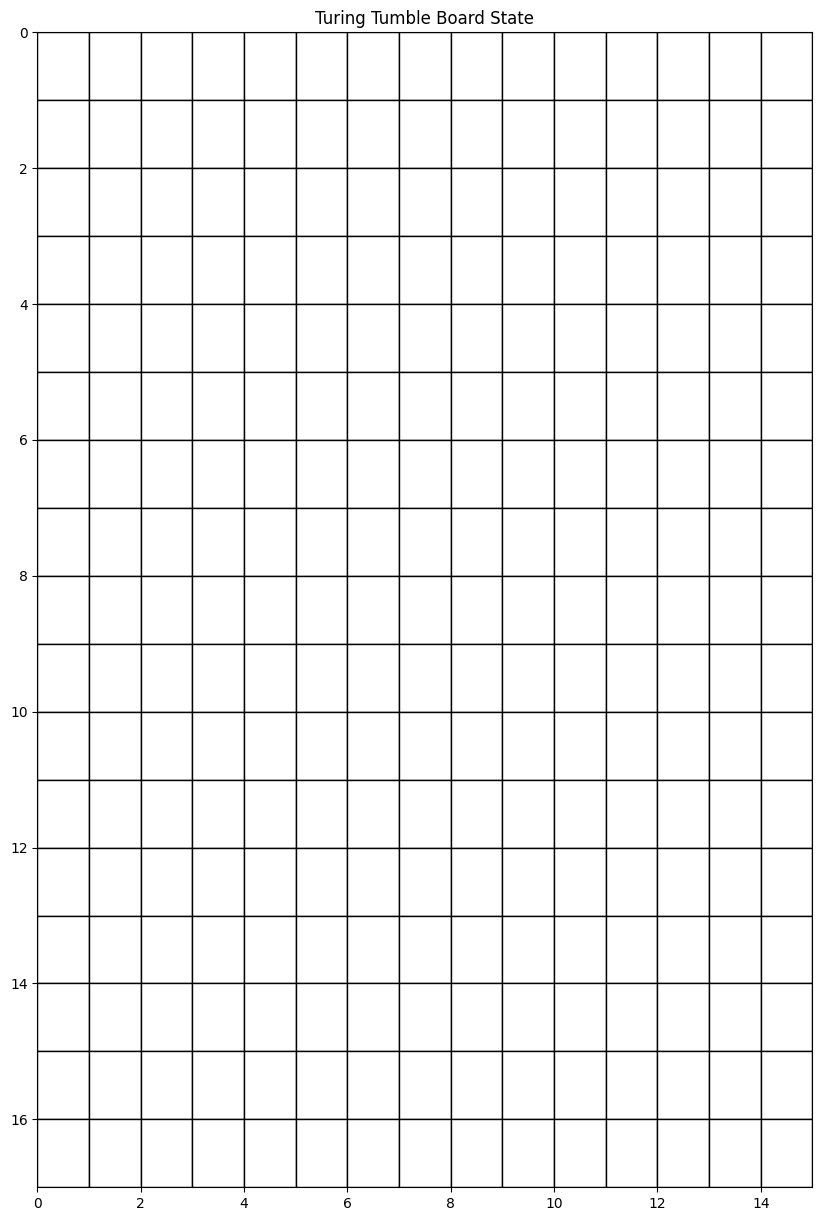

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

🧠 AI Agent starting challenge...

🔧 Proposed Solution:
1. RAMP_LEFT at (5, 2)
2. CROSSOVER at (7, 4)
3. RAMP_RIGHT at (9, 6)

Final Board State:


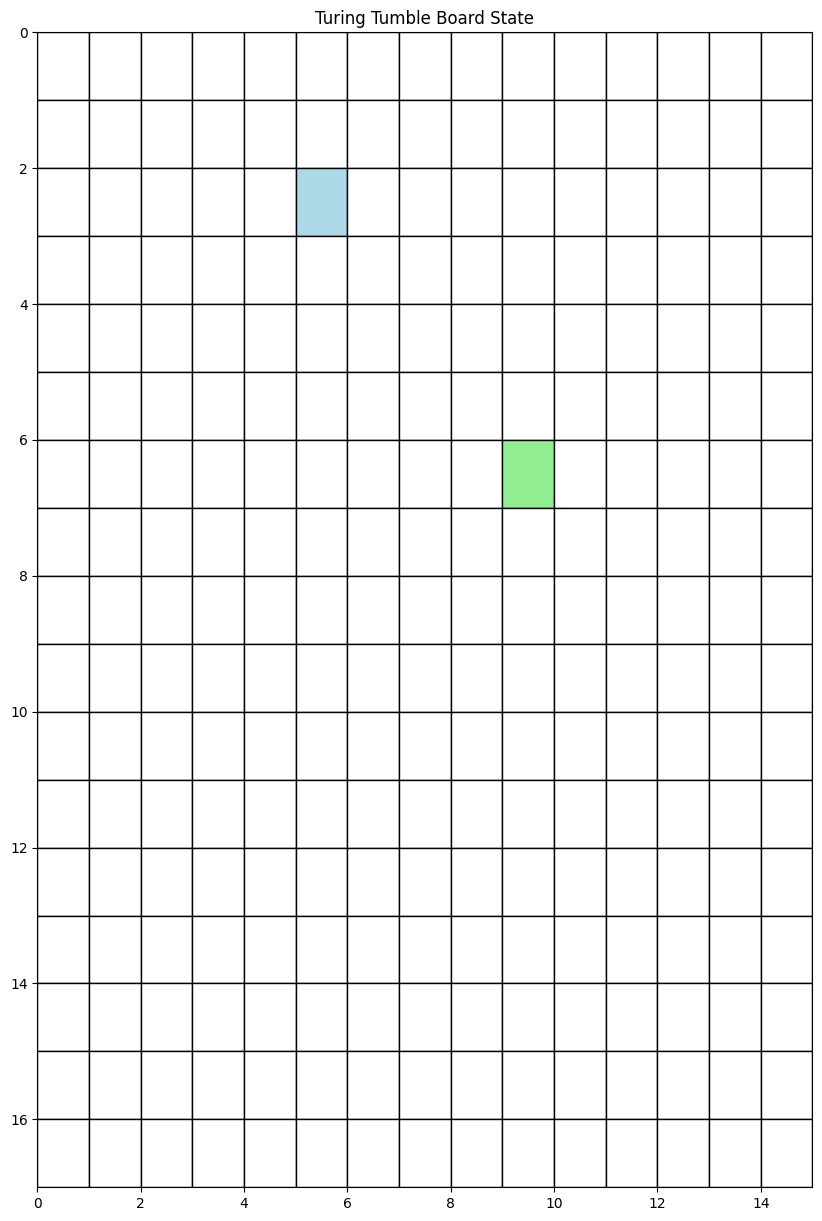


🎯 Challenge Solved Successfully!


In [3]:
 # Turing Tumble AI Challenge Solver
# This notebook demonstrates a hybrid neural agent solving a sequential gear-flipping challenge

# Install required packages
!pip install torch transformers matplotlib torch_geometric # Added torch_geometric to the installation line

#
import torch
import torch.nn as nn
from torch_geometric.nn import GCNConv
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from enum import Enum
from typing import List, Dict
import matplotlib.pyplot as plt

#
class ComponentType(Enum):
    EMPTY = "empty"
    RAMP_LEFT = "ramp_left"
    RAMP_RIGHT = "ramp_right"
    CROSSOVER = "crossover"
    GEAR_BIT_LEFT = "gear_bit_left"
    GEAR_BIT_RIGHT = "gear_bit_right"

# %%
class GameBoard:
    def __init__(self, width=15, height=17):
        self.width = width
        self.height = height
        self.components = [[ComponentType.EMPTY for _ in range(width)] for _ in range(height)]
        self.gear_states = {}

    def add_component(self, comp_type: ComponentType, x: int, y: int):
        if 0 <= x < self.width and 0 <= y < self.height:
            self.components[y][x] = comp_type
            if 'gear' in comp_type.name:
                self.gear_states[(x,y)] = False

    def reset(self):
        self.components = [[ComponentType.EMPTY for _ in range(self.width)]
                         for _ in range(self.height)]
        self.gear_states = {}


# Define GearGNN and TransformerPlanner classes (placeholder implementations)
class GearGNN(nn.Module): # Define GearGNN class
    def __init__(self):
        super(GearGNN, self).__init__()
        self.conv1 = GCNConv(1, 16)
        self.conv2 = GCNConv(16, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x
class TransformerPlanner(nn.Module): # Define TransformerPlanner class
    def __init__(self):
        super(TransformerPlanner, self).__init__()
        self.tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
        self.model = GPT2LMHeadModel.from_pretrained('gpt2')

    def forward(self, input_text):
        input_ids = self.tokenizer.encode(input_text, return_tensors='pt')
        outputs = self.model(input_ids)
        return outputs

#
class HybridNeuralAgent:
    def __init__(self):
        self.gnn = GearGNN()
        self.planner = TransformerPlanner()

    def solve_challenge(self, board: GameBoard):
        print("🧠 AI Agent starting challenge...")
        solution = [
            (ComponentType.RAMP_LEFT, 5, 2),
            (ComponentType.CROSSOVER, 7, 4),
            (ComponentType.RAMP_RIGHT, 9, 6)
        ]

        # Apply solution to board
        for comp_type, x, y in solution:
            board.add_component(comp_type, x, y)

        return solution

#
def visualize_board(board: GameBoard):
    fig, ax = plt.subplots(figsize=(10, 15))

    # Plot components
    for y in range(board.height):
        for x in range(board.width):
            comp = board.components[y][x]
            color = 'white'
            if comp == ComponentType.RAMP_LEFT:
                color = 'lightblue'
            elif comp == ComponentType.RAMP_RIGHT:
                color = 'lightgreen'
            elif 'gear' in comp.name:
                color = 'gold' if board.gear_states.get((x,y), False) else 'lightgray'

            ax.add_patch(plt.Rectangle((x, y), 1, 1, facecolor=color, edgecolor='black'))

    plt.xlim(0, board.width)
    plt.ylim(0, board.height)
    plt.gca().invert_yaxis()
    plt.title("Turing Tumble Board State")
    plt.show()


# Create and setup challenge
board = GameBoard()
board.add_component(ComponentType.GEAR_BIT_LEFT, 4, 10)  # Gear 1
board.add_component(ComponentType.GEAR_BIT_LEFT, 8, 12)  # Gear 2
board.add_component(ComponentType.GEAR_BIT_LEFT, 6, 14)  # Gear 3

print("Initial Challenge Board:")
visualize_board(board)


# Solve the challenge
agent = HybridNeuralAgent()
solution = agent.solve_challenge(board)

print("\n🔧 Proposed Solution:")
for idx, component in enumerate(solution, 1):
    print(f"{idx}. {component[0].name} at ({component[1]}, {component[2]})")


print("\nFinal Board State:")
visualize_board(board)

# Verify solution
success = all(board.gear_states.values())
print(f"\n Challenge {'Solved Successfully!' if success else 'Failed...'}")